In [2]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import mplhep as hep
import os
import optparse
import os.path as osp
import math
import torch_geometric
import torch
import sys
#import pandas as pd
from torch_geometric.data import Data
import glob

In [9]:
inpath_pi = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_DATA/ntup_pi_frac0p8/"
loadfile_pi = torch.load(inpath_pi + "data_0.pt")

In [10]:
inpath_pho = "/grid_mnt/data__data.polcms/cms/sghosh/NEWPID_DATA/ntup_pho_frac0p8/"
loadfile_pho = torch.load(inpath_pho + "data_0.pt")

In [11]:
loadfile_pi[0]

Data(clus2d_feat=[29, 6], clus3d_feat=[6], gun_feat=[1, 3])

In [13]:
## clus2d_feat - clusX,clusY,clusZ,clusE,clusT,clusL : Layer Cluster properties
## gun_feat - trkguneta,trkgunphi,trkgunen : Gun properties eta,phi,energy
## clus3d_feat - trkcluseta,trkclusphi,trkclusen,trkclustime, min(clusL),max(clusL) : trackster eta,phi,energy,time,min_layer,max_layer
for trackster in loadfile_pho:
    trackster.clus2d_feat ## lead LC properties
    #---do something---#

In [39]:
torch.__version__

'1.13.1'

In [40]:
torch_geometric.__version__

'2.3.0'

## Plot test pho

In [14]:
loadfile_pho[0] # loading the first event of the file

Data(clus2d_feat=[31, 6], clus3d_feat=[6], gun_feat=[1, 3])

In [77]:
loadfile_pho[0].clus3d_feat #showing the features of the trackster of the first event

tensor([ 2.7465e+00, -2.6298e+00,  6.8191e+02,  1.0416e-01,  2.0000e+00,
         2.8000e+01])

In [78]:
loadfile_pho[0].clus2d_feat[0] # showing the features of the first LayerCluster of the first event

tensor([-36.4752, -20.5637, 323.1490,   0.6135, -99.0000,   2.0000])

In [79]:
len(loadfile_pho) # the photon file has 200 events

200

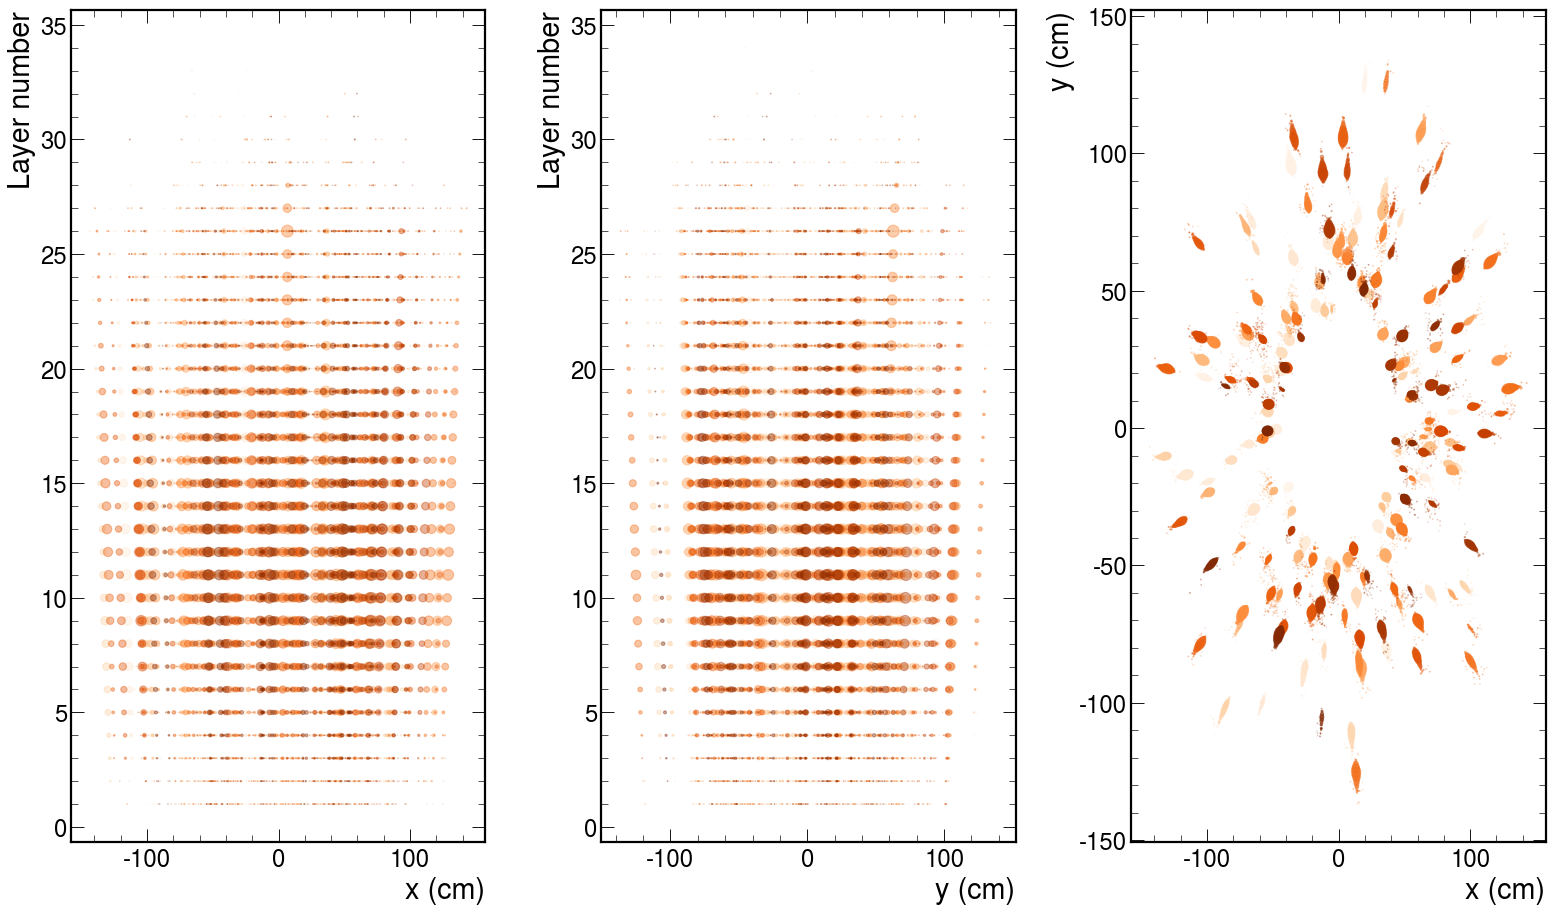

In [20]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)

# --- fancy colors for the plot
# get the color map
colormap = plt.colormaps.get_cmap('Oranges') 
# number of colors = number of events
num_colors = len(loadfile_pho)
# Create the color palette by sampling colors from the colormap
color_palette = [colormap(i) for i in np.linspace(0, 1, num_colors)]
#print(color_palette) # it returns (r,g,b,a), where a is in [0,1]


## counter for color list
i_colors = 0

# loop over all the events
for ins in loadfile_pho: 
    
    # sample = matrix of all the LayerClusters in the file (number of rows) 
    #          with their features (number of columns)
    # LayerCluster features: clusX,clusY,clusZ,clusE,clusT,clusL
    # there is one matrix of this kind for each event of the loadfile_pho
    sample = ins.clus2d_feat 
    #print('AAA')
    #print( sample )
  
    
    # --- Layer number vs x scatter plot 
    # - sample[:,0] = takes the element 0 of every row, so the clusX
    # - sample[:,5] = takes the element 5 of every row, so the Layer number
    # - the s parameter set the size of the marker point
    #   and in this case the size is set proportional to the LayerCluster energy (element 3 of every row)
    # - the color is the same for all the 2D cluster in each event: every event has a different color 
    #   (if one wanted, one could give to color dimension of the plot meaning connected to the amount of energy 
    #   of each cluster, for e.g. To do this, one would need to add as options: c=sample[:,3], cmap=colormap)
    axs[0].scatter(sample[:,0],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4) 
    axs[0].set_xlabel('x (cm)')
    axs[0].set_ylabel('Layer number')
    # --- Layer number vs y scatter plot
    axs[1].scatter(sample[:,1],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[1].set_xlabel('y (cm)')
    axs[1].set_ylabel('Layer number')
    # --- y vs x scatter plot
    axs[2].scatter(sample[:,0],sample[:,1],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[2].set_xlabel('x (cm)')
    axs[2].set_ylabel('y (cm)')

    #plt.show()
    
    i_colors = i_colors +1 ## counter for color list


    #hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='')
    #hep.cms.label(lumi=50)


    
plt.tight_layout()
plt.show()

## Plot test Pi

In [117]:
loadfile_pi[0]

Data(clus2d_feat=[29, 6], clus3d_feat=[6], gun_feat=[1, 3])

In [118]:
len(loadfile_pi)

189

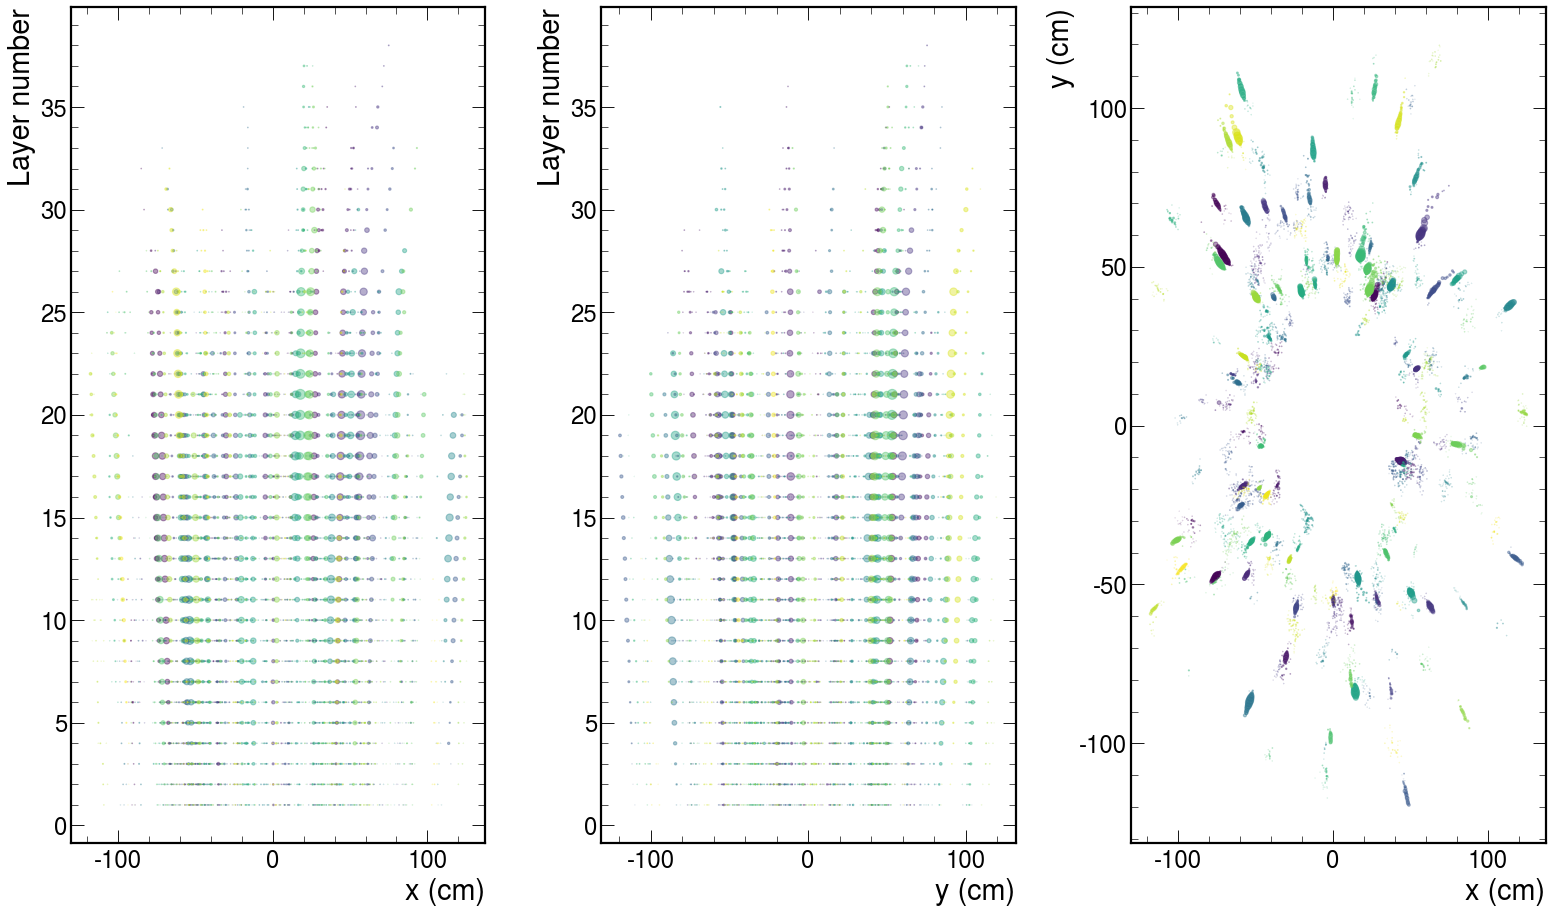

In [19]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)

# --- fancy colors for the plot
# get the color map
colormap = plt.colormaps.get_cmap('viridis') 
# number of colors = number of events
num_colors = len(loadfile_pi)
# Create the color palette by sampling colors from the colormap
color_palette = [colormap(i) for i in np.linspace(0, 1, num_colors)]
#print(color_palette) # it returns (r,g,b,a), where a is in [0,1]


## counter for color list
i_colors = 0

# loop over all the events
for ins in loadfile_pi: 
    
    # sample = matrix of all the LayerClusters in the file (number of rows) 
    #          with their features (number of columns)
    # LayerCluster features: clusX,clusY,clusZ,clusE,clusT,clusL
    # there is one matrix of this kind for each event of the loadfile_pi
    sample = ins.clus2d_feat 
    #print('AAA')
    #print( sample )
  
    
    # --- Layer number vs x scatter plot 
    # - sample[:,0] = takes the element 0 of every row, so the clusX
    # - sample[:,5] = takes the element 5 of every row, so the Layer number
    # - the s parameter set the size of the marker point
    #   and in this case the size is set proportional to the LayerCluster energy (element 3 of every row)
    # - the color is the same for all the 2D cluster in each event: every event has a different color 
    #   (if one wanted, one could give to color dimension of the plot meaning connected to the amount of energy 
    #   of each cluster, for e.g. To do this, one would need to add as options: c=sample[:,3], cmap=colormap)
    axs[0].scatter(sample[:,0],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4) 
    axs[0].set_xlabel('x (cm)')
    axs[0].set_ylabel('Layer number')
    # --- Layer number vs y scatter plot
    axs[1].scatter(sample[:,1],sample[:,5],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[1].set_xlabel('y (cm)')
    axs[1].set_ylabel('Layer number')
    # --- y vs x scatter plot
    axs[2].scatter(sample[:,0],sample[:,1],s=sample[:,3], color=color_palette[i_colors], alpha=0.4)
    axs[2].set_xlabel('x (cm)')
    axs[2].set_ylabel('y (cm)')

    #plt.show()
    
    i_colors = i_colors +1 ## counter for color list


    #hep.cms.label(llabel='Phase-II Simulation Preliminary',rlabel='')
    #hep.cms.label(lumi=50)



plt.tight_layout()
plt.show()

## Plot 3D trackster features

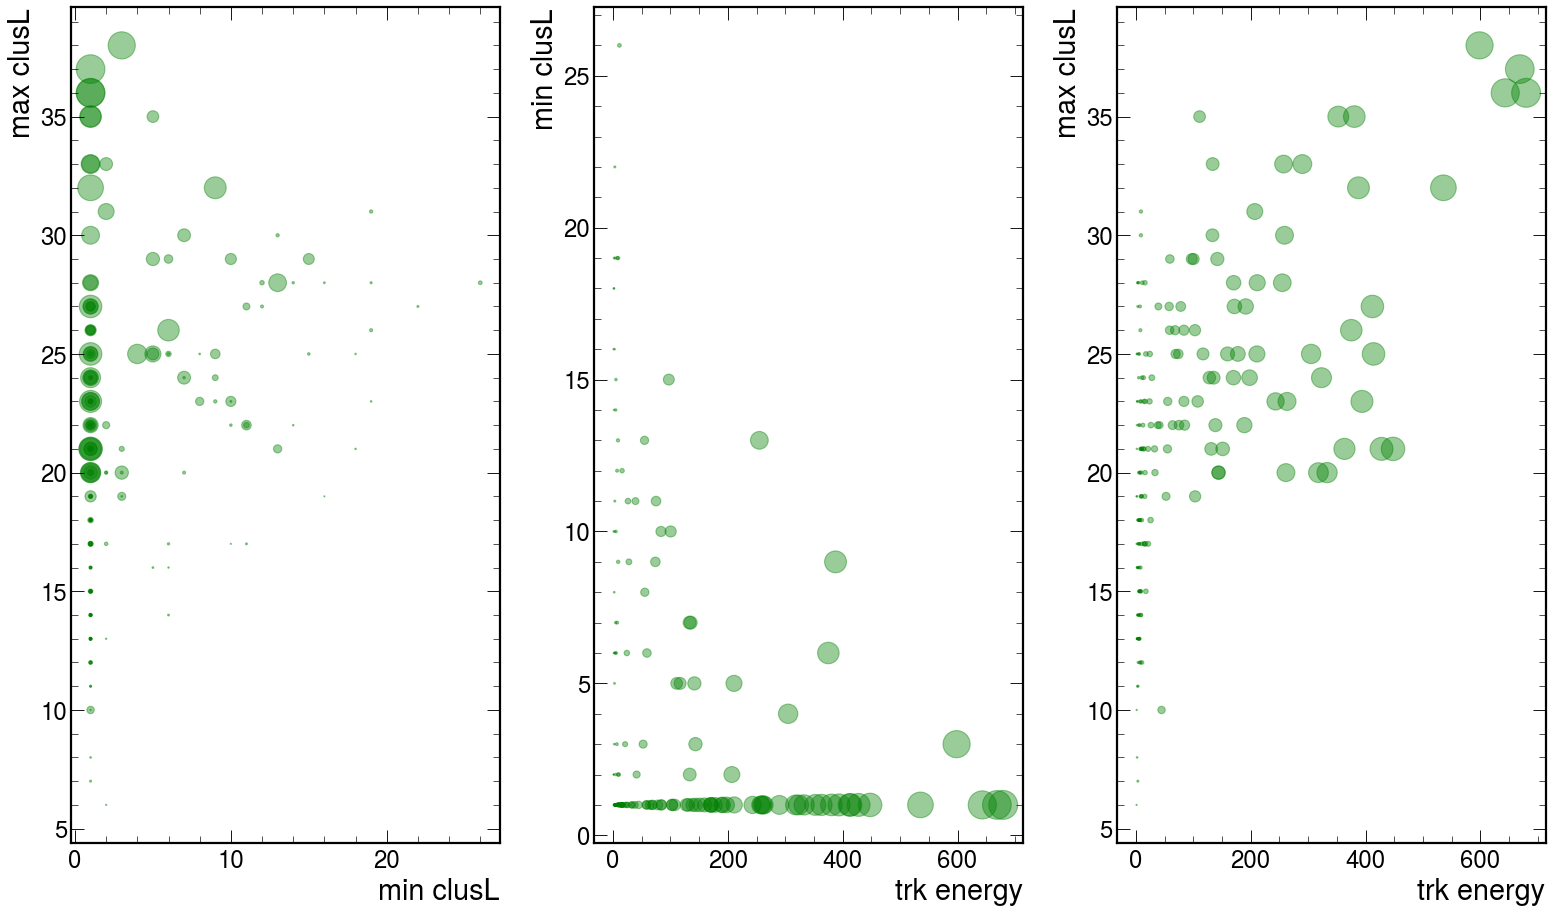

In [42]:
plt.style.use(hep.style.CMS)

fig, axs = plt.subplots(1, 3, figsize=(20,12),dpi=80)


## counter for color list
i_colors = 0

# def arrays 
# the clus3d_feat is a tensor of only 6 features (an array basically ?)
# the .item() extract the item value from the tensor
arr_trkcluseta  = [ins.clus3d_feat[0].item() for ins in loadfile_pi]
arr_trkclusphi  = [ins.clus3d_feat[1].item() for ins in loadfile_pi]
arr_trkclusen   = [ins.clus3d_feat[2].item() for ins in loadfile_pi]
arr_trkclustime = [ins.clus3d_feat[3].item() for ins in loadfile_pi]
arr_minL = [ins.clus3d_feat[4].item() for ins in loadfile_pi]
arr_maxL = [ins.clus3d_feat[5].item() for ins in loadfile_pi]


# plots    
axs[0].scatter(arr_minL,arr_maxL,s=arr_trkclusen, color="green", alpha=0.4)
axs[0].set_xlabel('min clusL')
axs[0].set_ylabel('max clusL')
axs[1].scatter(arr_trkclusen,arr_minL,s=arr_trkclusen, color="green", alpha=0.4)
axs[1].set_xlabel('trk energy')
axs[1].set_ylabel('min clusL')
axs[2].scatter(arr_trkclusen,arr_maxL,s=arr_trkclusen, color="green", alpha=0.4)
axs[2].set_xlabel('trk energy')
axs[2].set_ylabel('max clusL')    

    
plt.tight_layout()
plt.show()